<a href="https://colab.research.google.com/github/Nameless8243/TensorFlow_DL/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

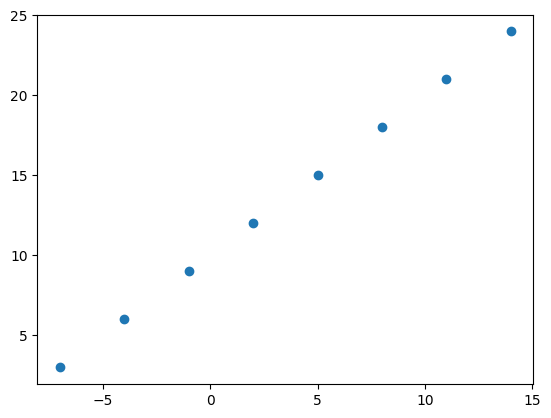

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

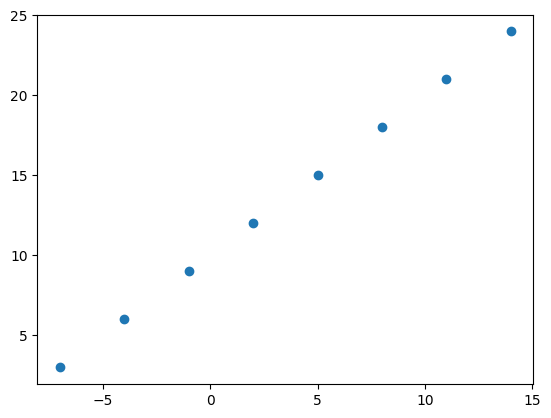

In [8]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the
function which tells our model how wrong it is) and the optimizer
(tells our model how to improve the patterns its learning) and
evaluation metrics (what we can use ta interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between X & y (features and labels).

In [9]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

In [10]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 13.1209 - mae: 13.1209
Epoch 2/5
1/1 [==============================] - 0s 34ms/step - loss: 13.0768 - mae: 13.0768
Epoch 3/5
1/1 [==============================] - 0s 24ms/step - loss: 13.0305 - mae: 13.0305
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 12.9820 - mae: 12.9820
Epoch 5/5
1/1 [==============================] - 0s 24ms/step - loss: 12.9309 - mae: 12.9309


In [11]:
# Check out X, and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 188ms/step


array([[2.7877326]], dtype=float32)

In [13]:
y_pred + 18

array([[20.787733]], dtype=float32)

## Improving our model

We can improve our model, by astering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 10.0291 - mae: 10.0291
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 9.8966 - mae: 9.8966
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 9.7641 - mae: 9.7641
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 9.6316 - mae: 9.6316
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 9.4991 - mae: 9.4991
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3666 - mae: 9.3666
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 9.2341 - mae: 9.2341
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1016 - mae: 9.1016
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 8.9691 - mae: 8.9691
Epoch 10/100
1/1 [==============================] - 0s 37ms/step - loss: 8.8366 - mae: 8.8366
Epoch 11/100
1/1 [==============================] - 0s 35ms/step - lo

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 154ms/step


array([[30.156116]], dtype=float32)

### Create a new model

In [22]:
# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 539ms/step - loss: 13.6644 - mae: 13.6644
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4375 - mae: 13.4375
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2183 - mae: 13.2183
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9965 - mae: 12.9965
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7866 - mae: 12.7866
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5625 - mae: 12.5625
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3203 - mae: 12.3203
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0536 - mae: 12.0536
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 11.7562 - mae: 11.7562
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 11.4080 - mae: 11.4080
Epoch 11/100
1/1 [==============================]

In [23]:
model.predict([17.0])

1/1 [==============================] - 0s 83ms/step


array([[33.3517]], dtype=float32)

In [43]:
# Let's see if we can make another to improve our model

# Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.6398 - mae: 13.6398
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 13.5710 - mae: 13.5710
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 13.5022 - mae: 13.5022
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 13.4335 - mae: 13.4335
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 13.3648 - mae: 13.3648
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2961 - mae: 13.2961
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 13.2275 - mae: 13.2275
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 13.1589 - mae: 13.1589
Epoch 9/100
1/1 [==============================] - 0s 37ms/step - loss: 13.0903 - mae: 13.0903
Epoch 10/100
1/1 [==============================] - 0s 39ms/step - loss: 13.0218 - mae: 13.0218
Epoch 11/100
1/1 [==============================] -

In [25]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [44]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[31.48515]], dtype=float32)